### Data Description: The data here contains medical costs of people characterized by certain attributes.

#### Leveraging customer information is paramount for mostbusinesses.
#### In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
#### age: age of primary beneficiary
#### sex: insurance contractor gender, female, male
#### bmi: Body mass index, providing an understanding of body,
#### weights that are relatively high or low relative to height,
#### objective index of body weight (kg / m ^ 2) using the ratio of
#### height to weight, ideally 18.5 to 24.9
#### children: Number of children covered by health insurance /
#### Number of dependents
#### smoker: Smoking
#### region: the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
#### charges: Individual medical costs billed by health insurance.

### Answer the following question
#### 1) Do charges of people who smoke differ significantly from the people who don't?
#### 2) Does bmi of males differ significantly from that of females?
#### 3) Is the proportion of smokers sigfnificantly different in different genders?
#### 4) Is the distribution of bmi across women with no children, one child and two children, the same?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
%matplotlib inline

In [2]:
sns.set() #setting the default seaborn style for our plots

In [3]:
df = pd.read_csv('insurance.csv') # read the data as a data frame

In [4]:
df.head()  #checking the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail() #checking the tail of the data frame

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Basic EDA
- Find the shape of the data,data type of individual columns
- Check the presence of missing values
- Descriptive stats of numerical columns
- Find the distribution of numerical columns and the asssociated skeweness and presence of outliers
- Distribution of categorical columns

In [7]:
df.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### The data has 1338 instances with 7 attributes, 2 integer type, 2 float type and 3 object type(Strings in the column)

In [8]:
df.isna().apply(pd.value_counts)   #null value check

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


### There are no null values in any of the column

In [10]:
df.describe().T   # five(max, min, std, mean, quartile) point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- Data looks legit - as all the statistics seems reasonable
- Looking at the age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children
- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

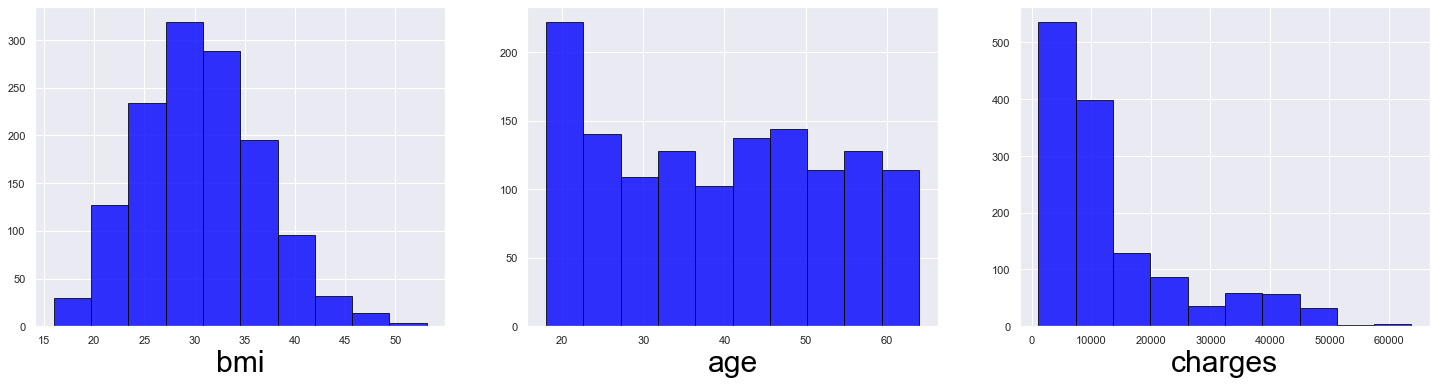

In [27]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='blue', edgecolor = 'black', alpha = 0.8)
plt.xlabel('bmi', color='black', fontsize=30)

plt.subplot(3,3,2)
plt.hist(df.age, color='blue', edgecolor = 'black', alpha = 0.8)
plt.xlabel('age', color='black', fontsize=30)

plt.subplot(3,3,3)
plt.hist(df.charges, color='blue', edgecolor = 'black', alpha = 0.8)
plt.xlabel('charges', color='black', fontsize=30)

plt.show()

- bmi looks quiet normally distributed
- Age seems be be distributed quiet uniformly
- As seen in the previous step, charges are highly skewed


In [28]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


- Skew of bmi is very less (skewness ~ 0) as seen in the previous step
- age is uniformly distributed (skewnwss is almost zero) and there's hardly any skew
- charges are highly skewed

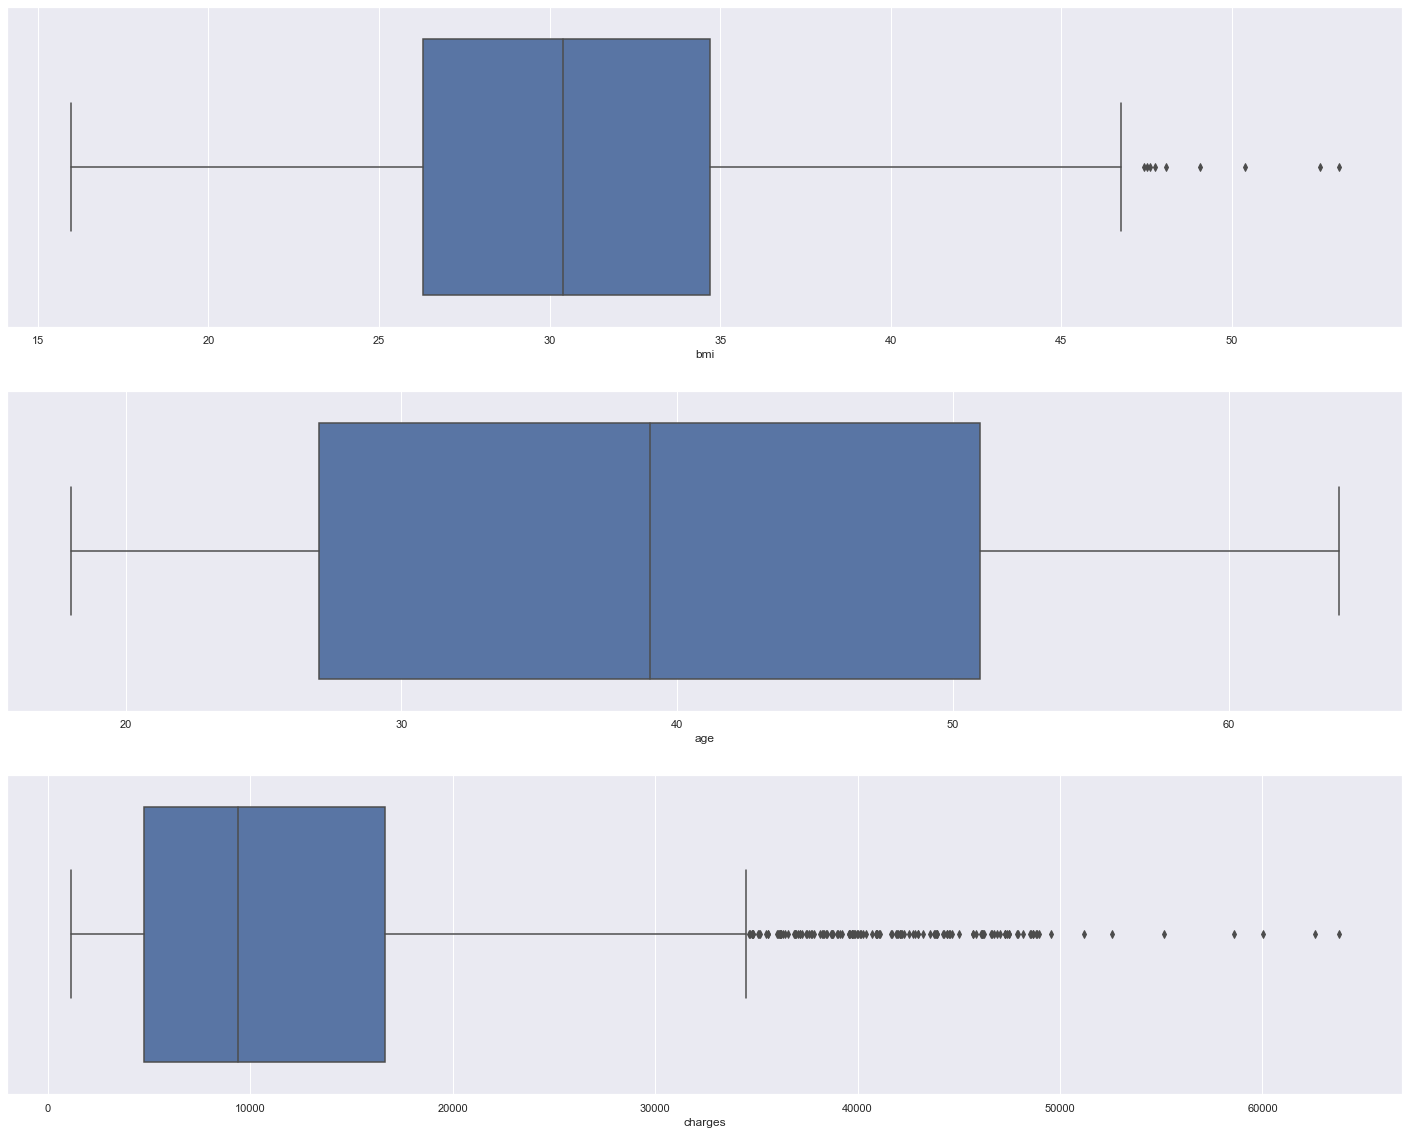

In [32]:
plt.figure(figsize= (25,20))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi)

plt.subplot(3,1,2)
sns.boxplot(x= df.age)

plt.subplot(3,1,3)
sns.boxplot(x= df.charges)

plt.show()


- bmi has a few extreme values(outliers)
- charges as it is highly skewed, there are quiet a lot of extreme values(outliers)

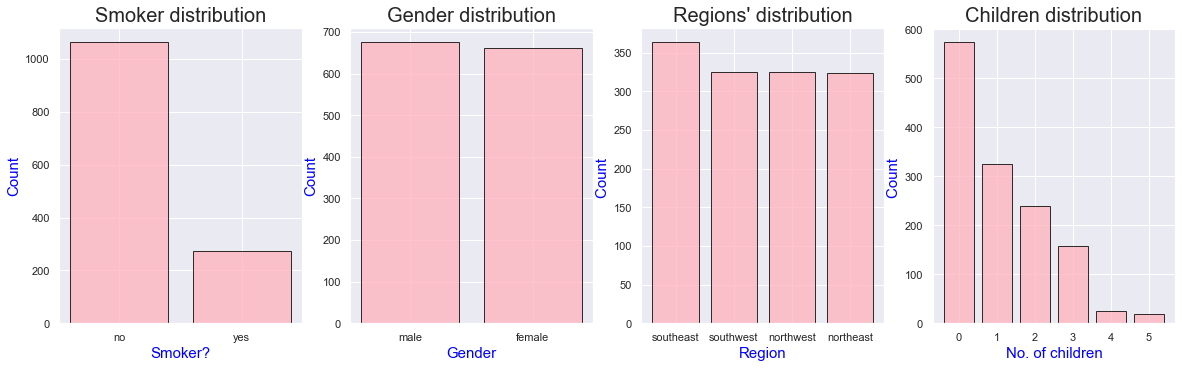

In [44]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,4,1)
plt.bar(x,y, align='center',color = 'lightpink',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Smoker?',color='blue',fontsize=15)
plt.ylabel('Count',color='blue',fontsize=15)
plt.title('Smoker distribution',fontsize=20)

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,4,2)
plt.bar(x1,y1, align='center',color = 'lightpink',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Gender',color='blue',fontsize=15)
plt.ylabel('Count',color='blue',fontsize=15)
plt.title('Gender distribution',fontsize=20)

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,4,3)
plt.bar(x2,y2, align='center',color = 'lightpink',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Region',color='blue',fontsize=15)
plt.ylabel('Count ',color='blue',fontsize=15)
plt.title("Regions' distribution",fontsize=20)

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,4,4)
plt.bar(x3,y3, align='center',color = 'lightpink',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('No. of children',color='blue', fontsize=15)
plt.ylabel('Count ',color='blue',fontsize=15,)
plt.title("Children distribution",fontsize=20)

plt.show()

- no. of non-smokers are greater than the  no. of smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children

### Bi-variate distribution of every possible attribute pair

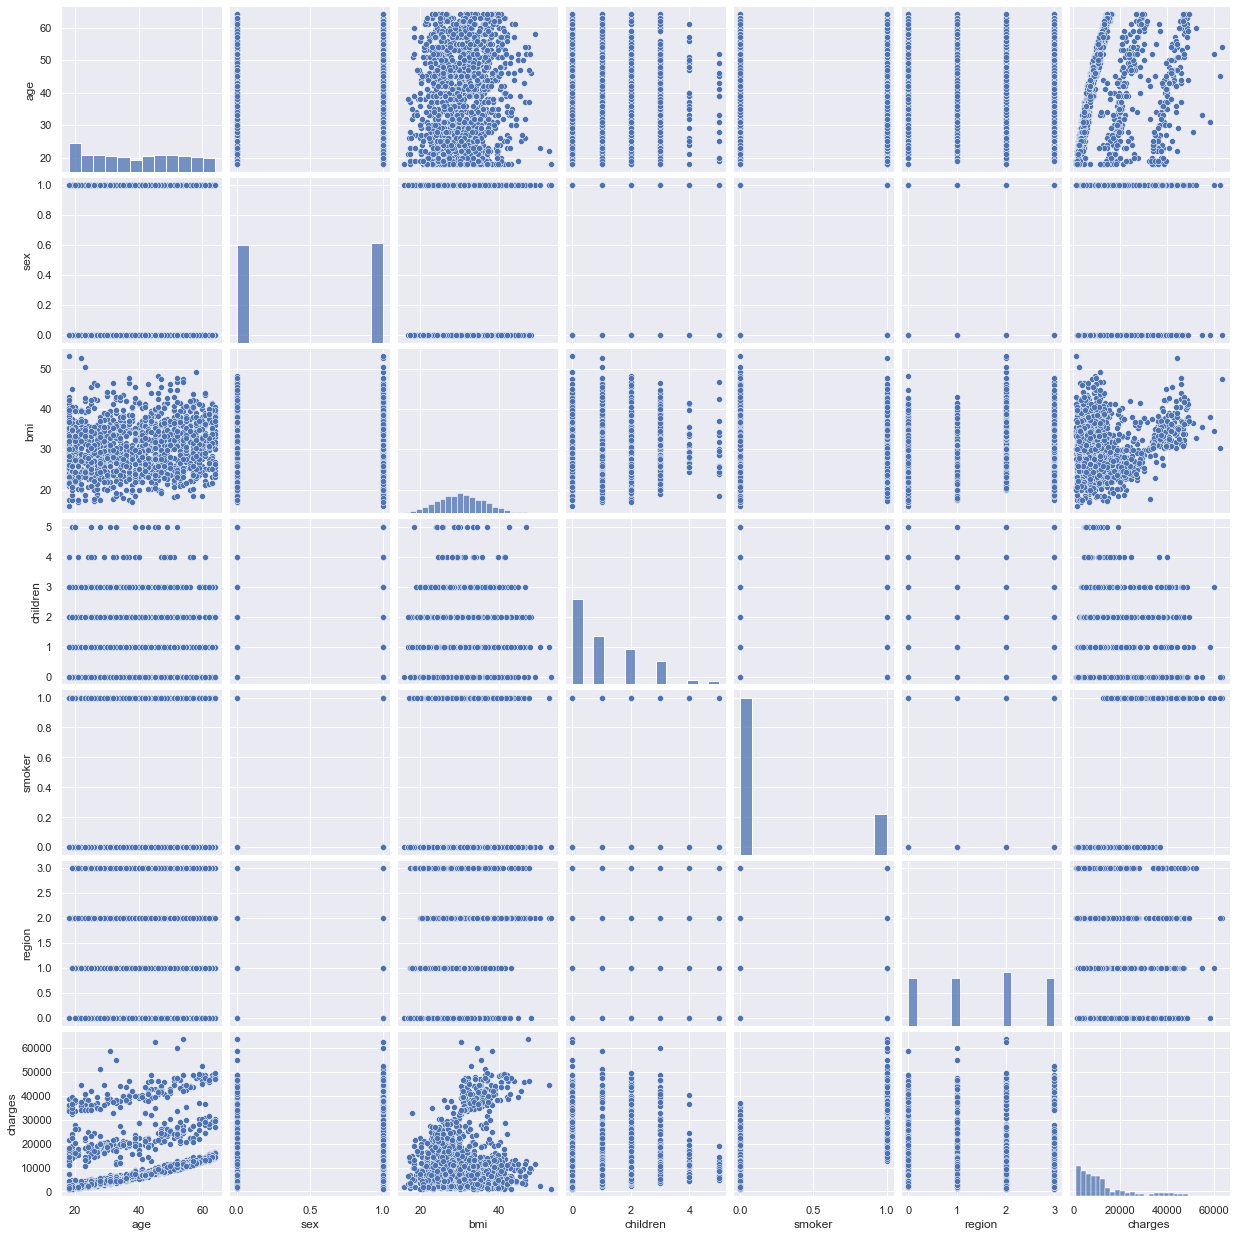

In [45]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because of the same ailment, older people are charged more than the younger ones
### Do charges of people who smoke differ significantly from the people who don't?

In [46]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


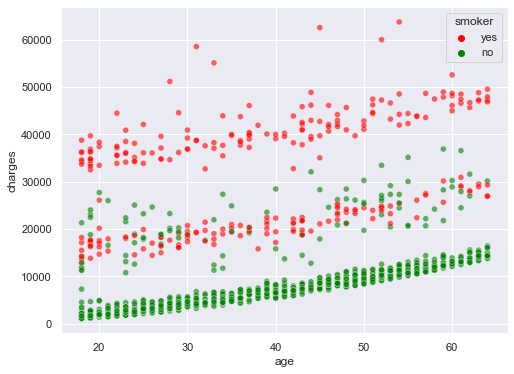

In [47]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

- from the above graph the difference between charges of smokers and charges of non-smokers is apparent

In [48]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


* Smokers seem to claim significantly more money than non-smokers (because p-value is satistically signifiacant so we drop the null hypothesis against alternate hypothesis)


### Does bmi of males differ significantly from that of females?

In [49]:
df.sex.value_counts()   #Checking the distribution of genders

male      676
female    662
Name: sex, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


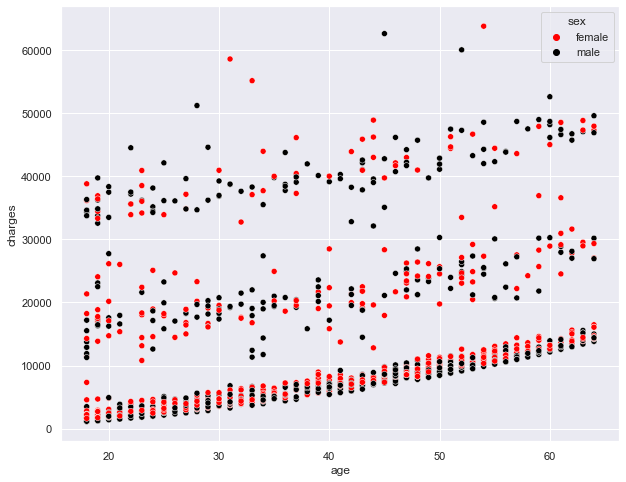

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['red','black'] )
plt.show()

- from the graph, there is no apparent relation between gender and charges

In [55]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Null Hypothesis
Ha = "Gender has an effect on bmi"   # Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


- bmi of both the genders are identical. Since the p-value of t-test is not statistically significant we do not reject the null hypothesis.

### Is the proportion of smokers significantly different in different genders?

In [56]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


- Proportion of smokers in males is significantly different from that of the females (the p-value is statistically significant so we reject the null hypothesis against the alternate hypothesis)

In [57]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


- Smoking haboits of people of different regions are similar (p-value is not statistically signifiacnt so we do not reject the null hypothesis against the alternate huypothesis)

### Is the distribution of bmi across women with no children, one child and two children, the same ?

In [58]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


* BMI is not changed by the number of children a women has (p-value is not statistically signifiacnt so we accept the null hypothesis against the alternate hypothesis)